In [55]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from scipy import misc
import sys
import os
import skimage
import skimage.io
import skimage.color
import skimage.transform
import numpy
import warnings
from time import time
from skimage.viewer import ImageViewer

C:\Users\Lenovo\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


# part A

In [30]:
def extract_channel(img):
    
    img_r, img_c = img.shape[:2]
    img_r -= img_r % 3

    cut = 0.1
    channel_row_cut = int(img_r // 3 * cut)
    channel_col_cut = int(img_c * cut)
    channel_size = img_r // 3

    b = img[channel_row_cut: channel_size - channel_row_cut,channel_col_cut: -channel_col_cut]

    g = img[channel_size + channel_row_cut: 2 * channel_size - channel_row_cut,channel_col_cut: -channel_col_cut]

    r = img[2 * channel_size + channel_row_cut: img_r - channel_row_cut,channel_col_cut: -channel_col_cut]
    
    skimage.io.imsave('blue_channel.png',b)
    skimage.io.imsave('green_channel.png',g)
    skimage.io.imsave('red_channel.png',r)
    return b,g,r


In [40]:
img = skimage.img_as_float(skimage.io.imread("04.jpg"))
b,g,r = extract_channel(img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


# part B

In [41]:
def stack_channels(red_channel,green_channel,blue_channel):
    
    width = red_channel.size[0] 
    height = red_channel.size[1]
    
    size = (red_channel.size[0] ,red_channel.size[1] )
    im = Image.new('RGB',size)
    
    for i in range(0,width):
        for j in range(0,height):
            r = red_channel.getpixel((i,j))
            g = green_channel.getpixel((i,j))
            b = blue_channel.getpixel((i,j))
            im.putpixel((i,j),(r, g, b))
            
    plt.imshow(im)

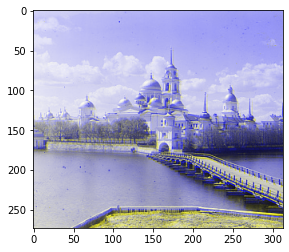

In [42]:
red_channel = Image.open("red_channel.png")
green_channel = Image.open("red_channel.png")
blue_channel = Image.open("blue_channel.png")
stack_channels(red_channel,green_channel,blue_channel)

# part c

In [87]:
def get_the_best_shifts(channel_a, channel_b, row_shift_search_range,col_shift_search_range):
    min_row_shift, max_row_shift = row_shift_search_range
    min_col_shift, max_col_shift = col_shift_search_range

    max_correlation = None
    the_best_row_shift = min_row_shift - 1
    the_best_col_shift = min_col_shift - 1

    channel_a_shifted = np.roll(
        channel_a, (min_row_shift - 1, min_col_shift - 1), axis=(0, 1))

    direction = -1
    
    for row_shift in range(min_row_shift, max_row_shift + 1):
        channel_a_shifted = np.roll(channel_a_shifted, 1, axis=0)

        direction = -direction

        if direction == -1:
            min_col_shift, max_col_shift = max_col_shift, min_col_shift

        for col_shift in range(min_col_shift, max_col_shift + direction,
                               direction):
            channel_a_shifted = numpy.roll(
                channel_a_shifted, direction, axis=1)

            cur_correlation = (channel_a_shifted * channel_b).sum()

            if max_correlation is None or cur_correlation > max_correlation:
                max_correlation = cur_correlation

                the_best_row_shift = row_shift
                the_best_col_shift = col_shift

        if direction == -1:
            min_col_shift, max_col_shift = max_col_shift, min_col_shift

    return (the_best_row_shift, the_best_col_shift)

In [65]:
def align_results(img):
    b,g,r = extract_channel(img)
    
    
    b_shifts = get_the_best_shifts(b,g,[-30,30],[-30,30])
    r_shifts = get_the_best_shifts(r,g,[-30,30],[-30,30])

    b = numpy.roll(b, b_shifts, axis=(0, 1))
    r = numpy.roll(r, r_shifts, axis=(0, 1))
    
    #Calculating final image size
    total_cut = (max(abs(b_shifts[0]), abs(r_shifts[0])), max(abs(b_shifts[1]), abs(r_shifts[1])))

    #Substraction in slices needs for cases when total_cut[0] or total_cut[1] == 0
    b = b[total_cut[0]: b.shape[0] - total_cut[0],total_cut[1]: b.shape[1] - total_cut[1]]
    g = g[total_cut[0]: g.shape[0] - total_cut[0],total_cut[1]: g.shape[1] - total_cut[1]]
    r = r[total_cut[0]: r.shape[0] - total_cut[0],total_cut[1]: r.shape[1] - total_cut[1]]
    
    skimage.io.imsave('final4.png',skimage.img_as_uint(numpy.dstack((r, g, b))))

    

In [60]:
img = skimage.img_as_float(skimage.io.imread("01.jpg"))
align_results(img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


In [62]:
img = skimage.img_as_float(skimage.io.imread("02.jpg"))
align_results(img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


In [64]:
img = skimage.img_as_float(skimage.io.imread("03.jpg"))
align_results(img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


In [66]:
img = skimage.img_as_float(skimage.io.imread("04.jpg"))
align_results(img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


# part D

In [83]:
def pyramid_shifts_search(channel_a, channel_b):
    depth = 3
    if channel_a.shape[0] > 1000 and channel_a.shape[1] > 1000:
        depth = 5

    channel_a_pyramid = tuple(skimage.transform.pyramid_gaussian(channel_a, max_layer=depth, downscale=2, multichannel=False))
    channel_b_pyramid = tuple(skimage.transform.pyramid_gaussian(channel_b, max_layer=depth, downscale=2, multichannel=False))

    row_shift_search_range = (-15,15)
    col_shift_search_range = (-15,15)
    for cur_a, cur_b in reversed(tuple(zip(channel_a_pyramid,channel_b_pyramid))):
        
        the_best_shifts = get_the_best_shifts(cur_a, cur_b,row_shift_search_range,col_shift_search_range)

        row_shift_search_range = (the_best_shifts[0]  - 15,the_best_shifts[0] +15)
        

        col_shift_search_range = (the_best_shifts[1] -15 ,the_best_shifts[1]  + 15)


    return the_best_shifts

In [86]:
img = skimage.img_as_float(skimage.io.imread("04.jpg"))
b,g,r = extract_channel(img) 
b_shifts = pyramid_shifts_search(b,g)
r_shifts = pyramid_shifts_search(r,g)

b = numpy.roll(b, b_shifts, axis=(0, 1))
r = numpy.roll(r, r_shifts, axis=(0, 1))
    
#Calculating final image size
total_cut = (max(abs(b_shifts[0]), abs(r_shifts[0])), max(abs(b_shifts[1]), abs(r_shifts[1])))

#Substraction in slices needs for cases when total_cut[0] or total_cut[1] == 0
b = b[total_cut[0]: b.shape[0] - total_cut[0],total_cut[1]: b.shape[1] - total_cut[1]]
g = g[total_cut[0]: g.shape[0] - total_cut[0],total_cut[1]: g.shape[1] - total_cut[1]]
r = r[total_cut[0]: r.shape[0] - total_cut[0],total_cut[1]: r.shape[1] - total_cut[1]]
    
skimage.io.imsave('final8.png',skimage.img_as_uint(numpy.dstack((r, g, b))))


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
